In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [9]:
df = pd.read_csv('heart.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age-Cholesterol plot')

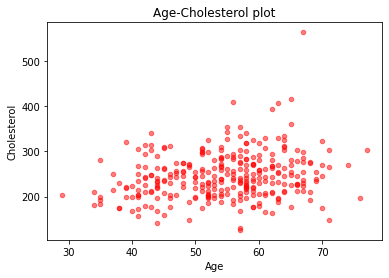

In [19]:
#see if there is a relationship between age and cholesterol
df.plot(kind='scatter', x='age', y = 'chol', alpha = 0.5, color='red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol plot')

We can confirm that as age increases there is a positive correlation with cholersterol levels

In [23]:
#convert categorical variables
df_new = pd.get_dummies(df, columns = ['cp', 'thal'], drop_first=True)

In [58]:
#define X and y for model
X = df_new.drop('target', axis = 1) #do not include target variable, y, in X
y = df_new.target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [60]:
from sklearn.model_selection import GridSearchCV

ml = svm.SVC()

para_grid = {'C' : [1, 10, 100, 1000], 'gamma' :[1, 0.1, 0.01, 0.001], 'kernel':['rbf']}

grid = GridSearchCV(ml, para_grid, refit=True, verbose=1, cv=5, n_jobs = -1)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [61]:
#print best parameter
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [62]:
accuracy = grid_search.best_score_

In [63]:
accuracy

0.5946428571428571

In [64]:
y_test_hat = grid.predict(X_test)


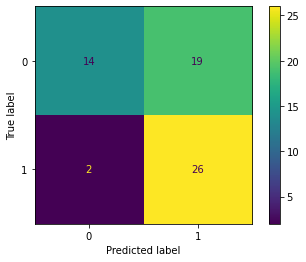

In [66]:
#confusion matrix for test case
#confusion_matrix(y_test, y_test_hat)
#clf = SVC(random_state=0)
#clf.fit(X_train, y_train)
#SVC(random_state=0)
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
plt.show()

In [69]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.58      0.93      0.71        28

    accuracy                           0.66        61
   macro avg       0.73      0.68      0.64        61
weighted avg       0.74      0.66      0.64        61



In [ ]:
#We see the model has an overall accuracy of 66%
# Precision in "yes" (1) outcome is about 58% and recall is about 93%